In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
ds1 = pd.read_csv('data/Dataset 1_EV charging reports.csv', sep=';', decimal=',')

ds2 = pd.read_csv('data/Dataset 2_Hourly EV loads - Per user.csv', sep=';', decimal=',')

ds3a = pd.read_csv('data/Dataset 3a_Hourly EV loads - Aggregated private.csv', sep=';', decimal=',')

ds3b = pd.read_csv('data/Dataset 3b_Hourly EV loads - Aggregated shared.csv', sep=';', decimal=',')

ds5 = pd.read_csv('data/Dataset 5_AMS data from garage Bl2.csv', sep=';', decimal=',')

ds6 = pd.read_csv('data/Dataset 6_Local traffic distribution.csv', sep=';', decimal=',')

In [34]:
ds1_clean = ds1.dropna(subset=['End_plugout','Start_plugin']) #drop rows with missing values in the specified columns


ds1['Start_plugin'] = pd.to_datetime(ds1_clean['Start_plugin'], format='%d.%m.%Y %H:%M') #format the string to a datetime object
ds1['End_plugout'] = pd.to_datetime(ds1_clean['End_plugout'], format='%d.%m.%Y %H:%M')

ds1_clean = ds1_clean[ds1_clean['El_kWh'] > 0] #if no energy was charged the row should be dropped

ds1_clean['min_needed_hours_11kW'] = ds1_clean['El_kWh'] / 11 #min hours needed to charge a car with a power of 11 kW


numpy.float64

In [38]:
ds1_clean = ds1_clean[ds1_clean['El_kWh'] > 0] #if no energy was charged the row should be dropped

ds1_clean['min_needed_hours_11kW'] = ds1_clean['El_kWh'] / 11 #min hours needed to charge a car with a power of 11 kW

ds1_clean['recorded_duration_hours'] = (ds1_clean['End_plugout'] - ds1_clean['Start_plugin']).dt.total_seconds() / 3600 #duration taken by each car

impossible_duration = ds1_clean['recorded_duration_hours'] < ds1_clean['min_needed_hours_11kW'] #check if the recorded duration is less than the minimum needed hours to charge the car

ds1_clean.loc[impossible_duration, 'End_plugout'] = pd.NaT

ds1_clean.dropna(subset=['End_plugout'], inplace=True)  

display(ds1_clean['min_needed_hours_11kW'])

0       0.027273
1       0.079091
2       2.715455
3       1.414545
4       0.329091
          ...   
6873    1.220909
6874    0.827273
6875    0.389091
6876    0.210000
6877    1.830909
Name: min_needed_hours_11kW, Length: 6827, dtype: float64

In [10]:
ds1_clean_shared = ds1_clean.dropna(subset=['Shared_ID']) #filter the dataset to only include shared charging sessions

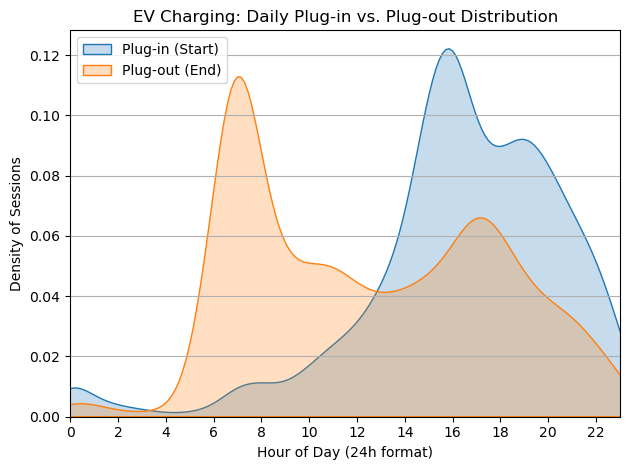

In [11]:

#get the plugin and plugout times
plugin_hour = ds1['Start_plugin'].dt.hour 
plugout_hour = ds1['End_plugout'].dt.hour


# plugin distribution
sns.kdeplot(plugin_hour, fill=True, label='Plug-in (Start)')

# plugout distribution
sns.kdeplot(plugout_hour, fill=True, label='Plug-out (End)')




# Formatting
plt.title('EV Charging: Daily Plug-in vs. Plug-out Distribution')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Density of Sessions')
plt.xticks(range(0, 25, 2)) 
plt.xlim(0, 23)
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.show()

Plug-outs peak in the morning around the begining of the work day, while plugins peak after work hours end